In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import unicodedata
from plot_config import set_matplotlib, set_seaborn

df = pd.read_csv("../data/processed/accidents.csv", dtype={0: str, 53: str})
df.head(3).T

,0,1,2
numero_boletim,2019026821139001,2019026821139001,2019026821139001
tipo_acidente,H01002,H01002,H01002
desc_tipo_acidente,ABALROAMENTO COM VITIMA,ABALROAMENTO COM VITIMA,ABALROAMENTO COM VITIMA
cod_tempo,0,0,0
desc_tempo,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO
cod_pavimento,0,0,0
pavimento,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO
cod_regional,25,25,25
desc_regional,PAMPULHA,PAMPULHA,PAMPULHA
origem_boletim,POLICIA MILITAR,POLICIA MILITAR,POLICIA MILITAR


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456750 entries, 0 to 456749
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   numero_boletim          456750 non-null  object 
 1   tipo_acidente           456750 non-null  object 
 2   desc_tipo_acidente      456750 non-null  object 
 3   cod_tempo               456750 non-null  int64  
 4   desc_tempo              456750 non-null  object 
 5   cod_pavimento           456750 non-null  int64  
 6   pavimento               456750 non-null  object 
 7   cod_regional            456750 non-null  int64  
 8   desc_regional           445757 non-null  object 
 9   origem_boletim          456750 non-null  object 
 10  velocidade_permitida    456750 non-null  int64  
 11  indicador_fatalidade    456750 non-null  object 
 12  valor_ups               456750 non-null  int64  
 13  descricao_ups           456750 non-null  object 
 14  Data                

In [3]:
def padronizar_coluna(col):
    col = unicodedata.normalize("NFKD", col).encode("ASCII", "ignore").decode("utf-8")
    col = col.strip()
    col = re.sub(r"[^A-Za-z0-9\s_]", "", col)  # remove caracteres especiais
    col = re.sub(r"\s+", "_", col)            # troca espaços por underscores
    return col.lower()                        # ou .upper() se preferir

# Aplicando no DataFrame
df.columns = [padronizar_coluna(col) for col in df.columns]

In [4]:
def padronizar_texto(texto):
    if pd.isna(texto):
        return texto
    # Remove acentos
    texto = unicodedata.normalize("NFKD", str(texto)).encode("ASCII", "ignore").decode("utf-8")
    # Remove caracteres especiais (mantém letras, números e espaços)
    texto = re.sub(r"[^A-Za-z0-9\s]", "", texto)
    # Remove espaços extras e converte para maiúsculo
    return texto.strip().upper()

# Aplica em todas as colunas tipo 'object'
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].apply(padronizar_texto)

In [5]:
set_matplotlib()
set_seaborn()

In [6]:
df.head()

,numero_boletim,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,...,tipo_logradouro,nome_logradouro,tipo_bairro,descricao_tipo_bairro,no_imovel,bairro,data_logradouro,hora_logradouro,longitude,latitude
0,2019026821139001,H01002,ABALROAMENTO COM VITIMA,0,NAO INFORMADO,0,NAO INFORMADO,25,PAMPULHA,POLICIA MILITAR,...,RUA,ANTONIO ALEIXO,B,BAIRRO,0,SERRANO,20190607,133800,NaN,NaN
1,2019026821139001,H01002,ABALROAMENTO COM VITIMA,0,NAO INFORMADO,0,NAO INFORMADO,25,PAMPULHA,POLICIA MILITAR,...,RUA,DA BAHIA,B,BAIRRO,0,CENTRO,20190607,133800,NaN,NaN
2,2019026821139001,H01002,ABALROAMENTO COM VITIMA,0,NAO INFORMADO,0,NAO INFORMADO,25,PAMPULHA,POLICIA MILITAR,...,RUA,ANTONIO ALEIXO,B,BAIRRO,0,SERRANO,20190607,133800,NaN,NaN
3,2019026821139001,H01002,ABALROAMENTO COM VITIMA,0,NAO INFORMADO,0,NAO INFORMADO,25,PAMPULHA,POLICIA MILITAR,...,RUA,DA BAHIA,B,BAIRRO,0,CENTRO,20190607,133800,NaN,NaN
4,2019026821139001,H01002,ABALROAMENTO COM VITIMA,0,NAO INFORMADO,0,NAO INFORMADO,25,PAMPULHA,POLICIA MILITAR,...,RUA,ANTONIO ALEIXO,B,BAIRRO,0,SERRANO,20190607,133800,NaN,NaN


In [7]:
total_acidentes = df['numero_boletim'].nunique()
print(f'Total de acidentes: {total_acidentes}')

Total de acidentes: 71464


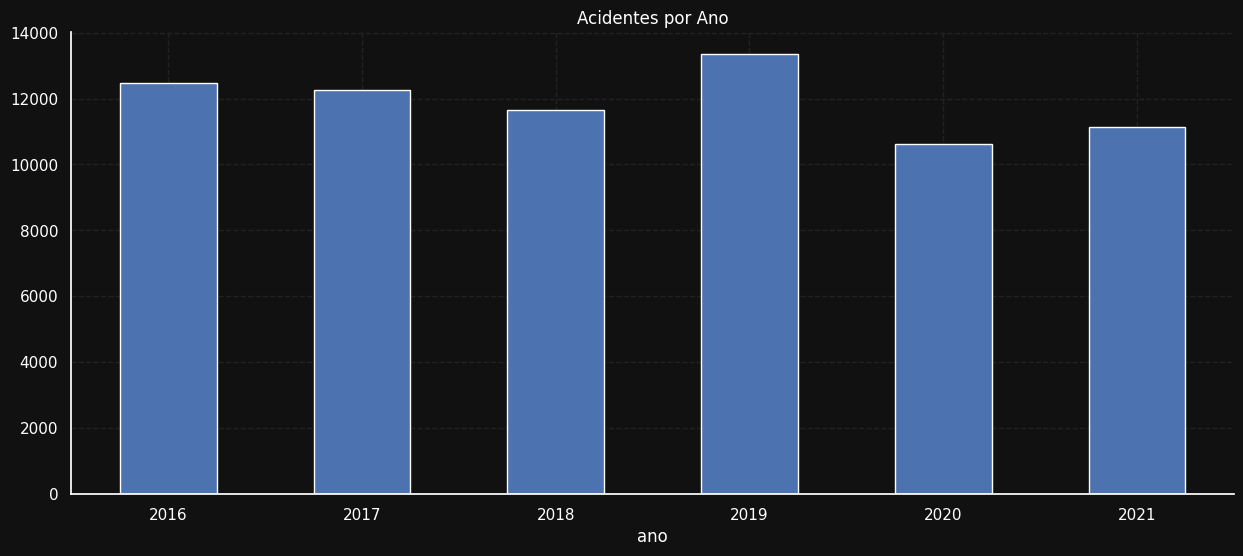

In [8]:
acidentes_por_ano = df.groupby('ano')['numero_boletim'].nunique()
acidentes_por_ano.plot(kind='bar', title='Acidentes por Ano')
plt.xticks(rotation=0);

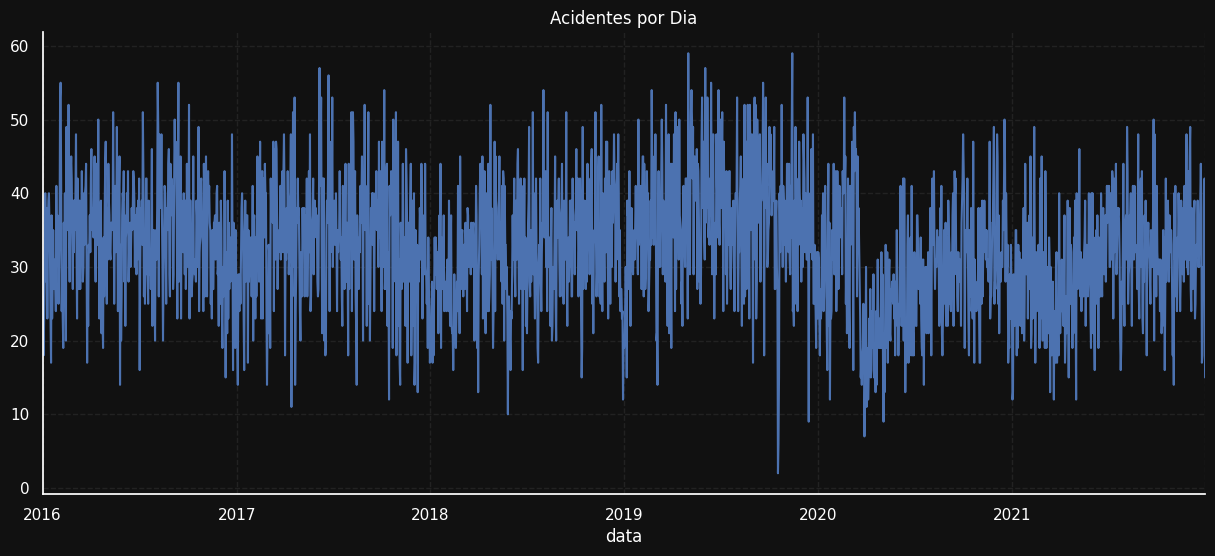

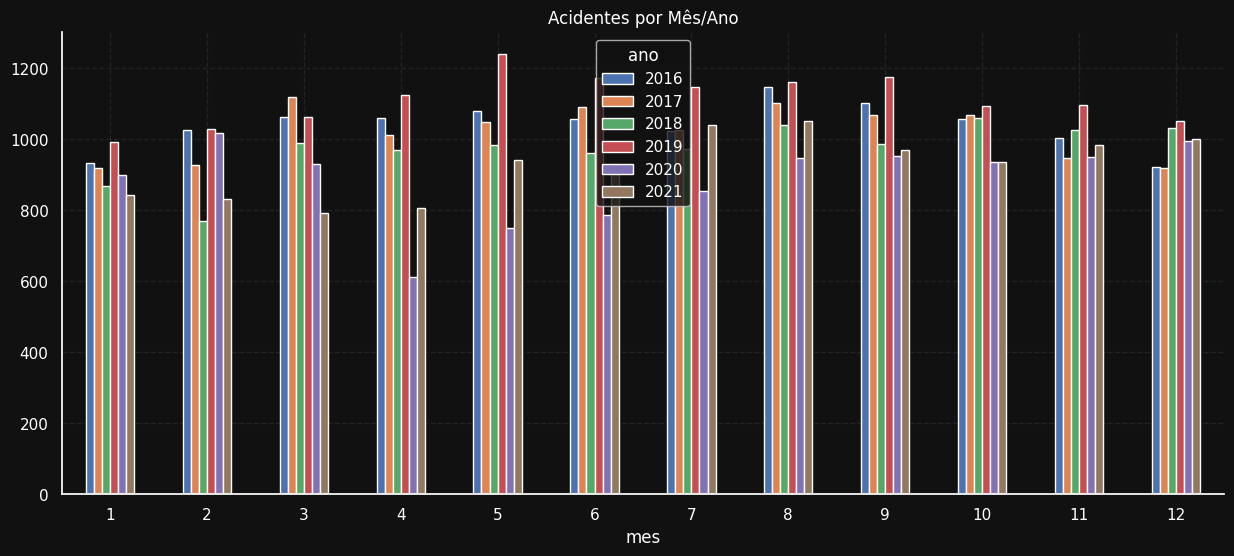

In [9]:
df['data'] = pd.to_datetime(df['data'])

acidentes_por_dia = df.groupby('data')['numero_boletim'].nunique()
acidentes_por_dia.plot(title='Acidentes por Dia')

acidentes_por_mes = df.groupby(['ano', 'mes'])['numero_boletim'].nunique()
acidentes_por_mes.unstack().T.plot(kind='bar', title='Acidentes por Mês/Ano')
plt.xticks(rotation=0);

In [10]:
total_envolvidos = df['numero_envolvido'].nunique()
print(f'Total de pessoas envolvidas: {total_envolvidos}')

Total de pessoas envolvidas: 40


In [11]:
total_mortes = df[df['indicador_fatalidade'] == 'SIM']['numero_boletim'].nunique()
print(f'Total de mortes: {total_mortes}')

Total de mortes: 640


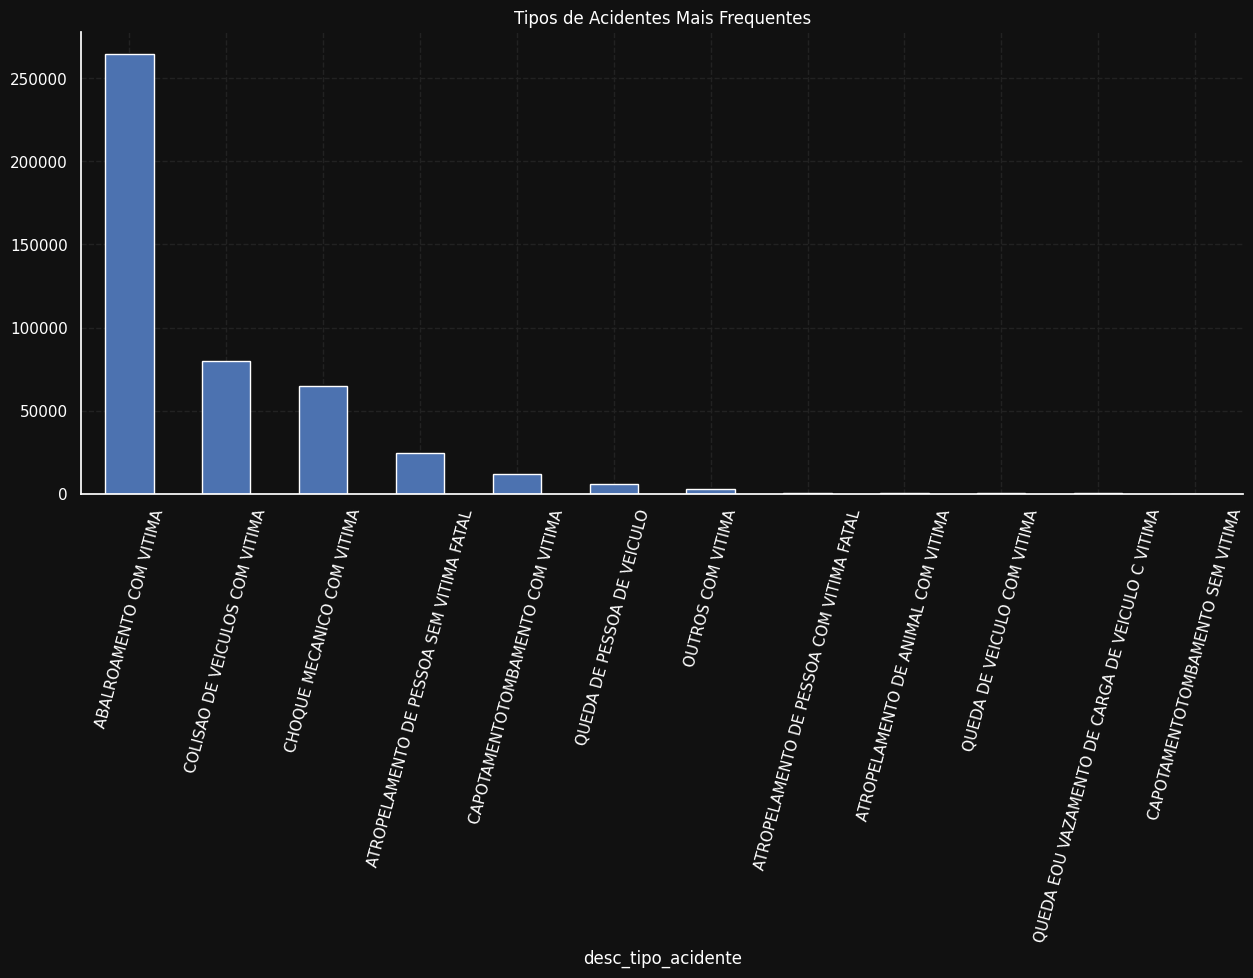

In [12]:
df['desc_tipo_acidente'].value_counts().plot(kind='bar', title='Tipos de Acidentes Mais Frequentes')
plt.xticks(rotation=75);

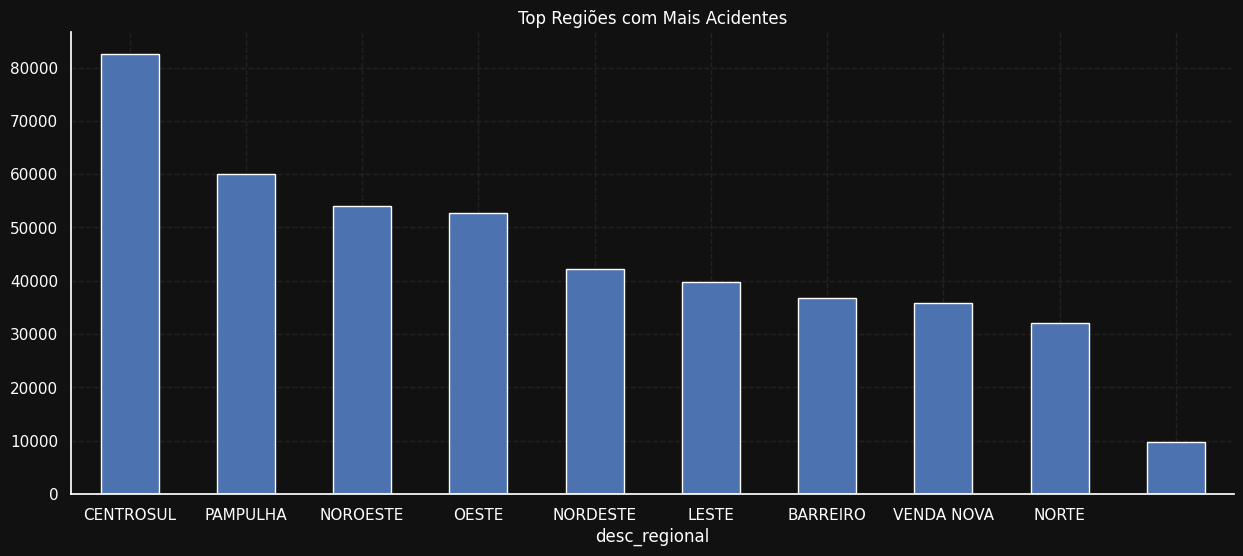

In [13]:
df['desc_regional'].value_counts().head(10).plot(kind='bar', title='Top Regiões com Mais Acidentes')
plt.xticks(rotation=0);

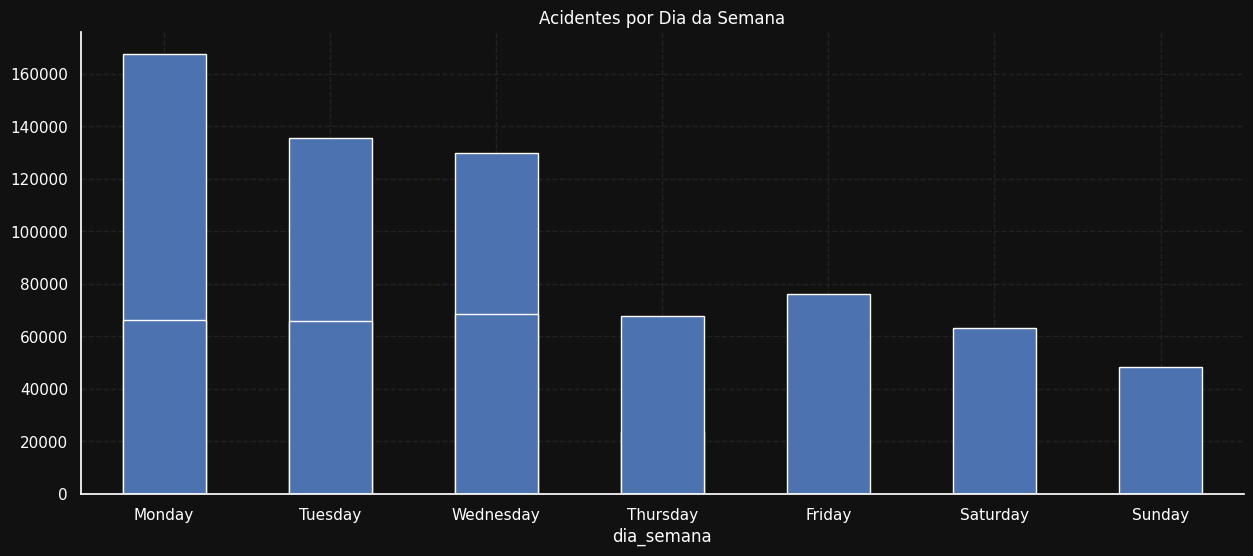

In [14]:
df['faixa_hora'].value_counts().plot(kind='bar', title='Acidentes por Faixa Horária')

df['dia_semana'] = df['data'].dt.day_name()

df['dia_semana'].value_counts().loc[
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
].plot(kind='bar', title='Acidentes por Dia da Semana')
plt.xticks(rotation=0);

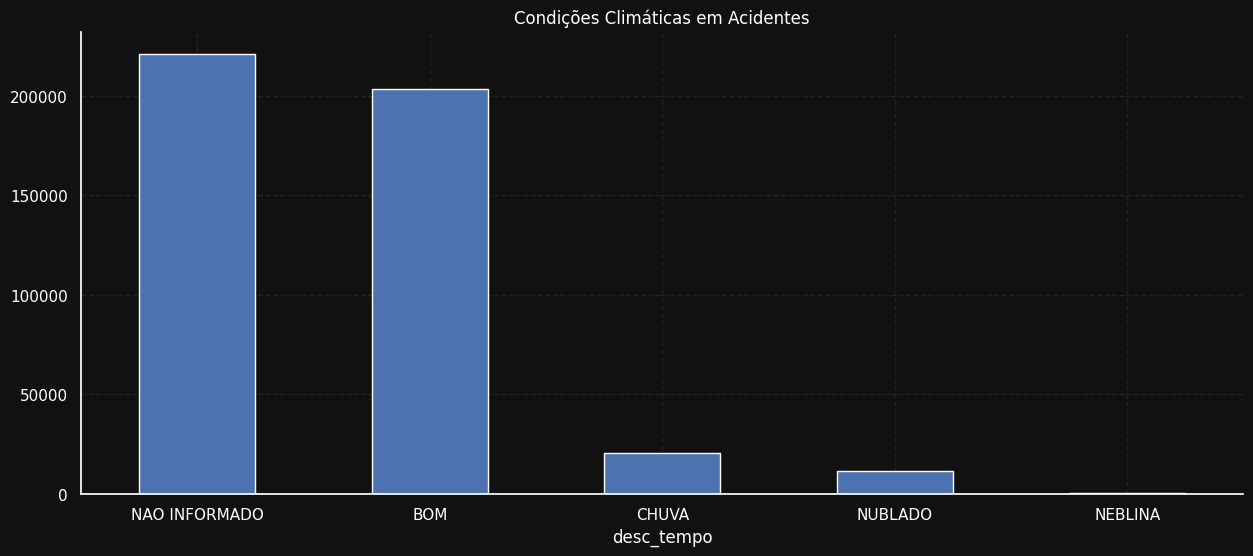

In [15]:
df['desc_tempo'].value_counts().plot(kind='bar', title='Condições Climáticas em Acidentes')
plt.xticks(rotation=0);

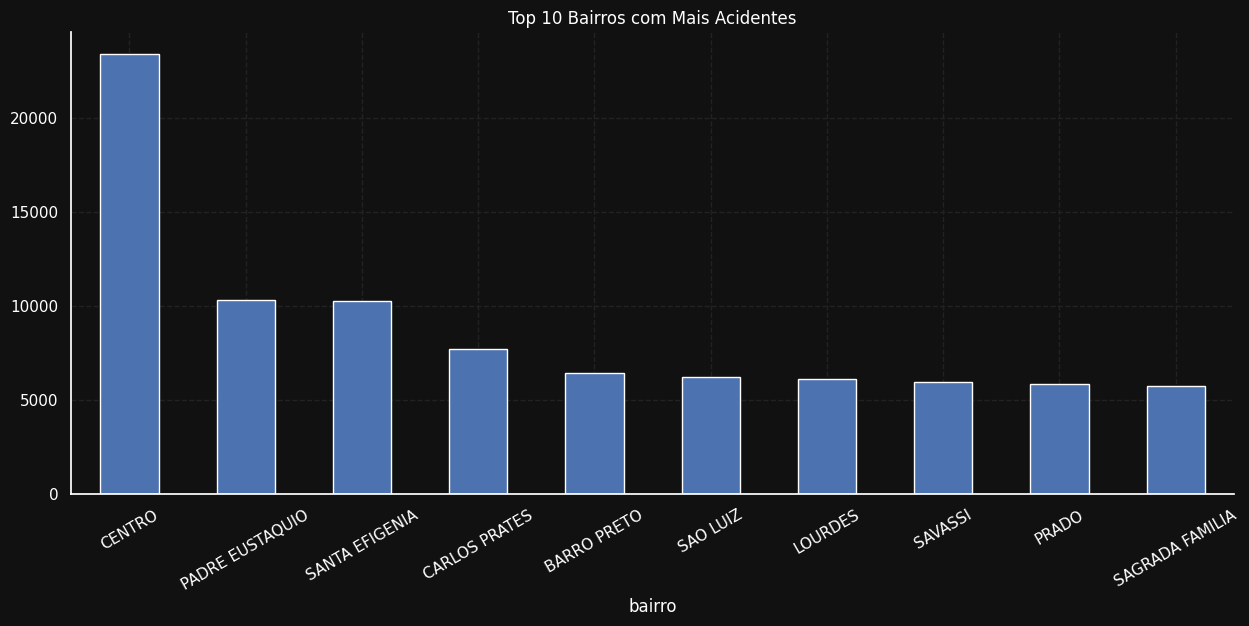

In [16]:
df['bairro'].value_counts().head(10).plot(kind='bar', title='Top 10 Bairros com Mais Acidentes')
plt.xticks(rotation=30);

In [17]:
media_idade = df[df['condutor'] == 'S']['idade'].mean()
print(f'Média de idade dos condutores: {media_idade:.2f}')

Média de idade dos condutores: 34.41


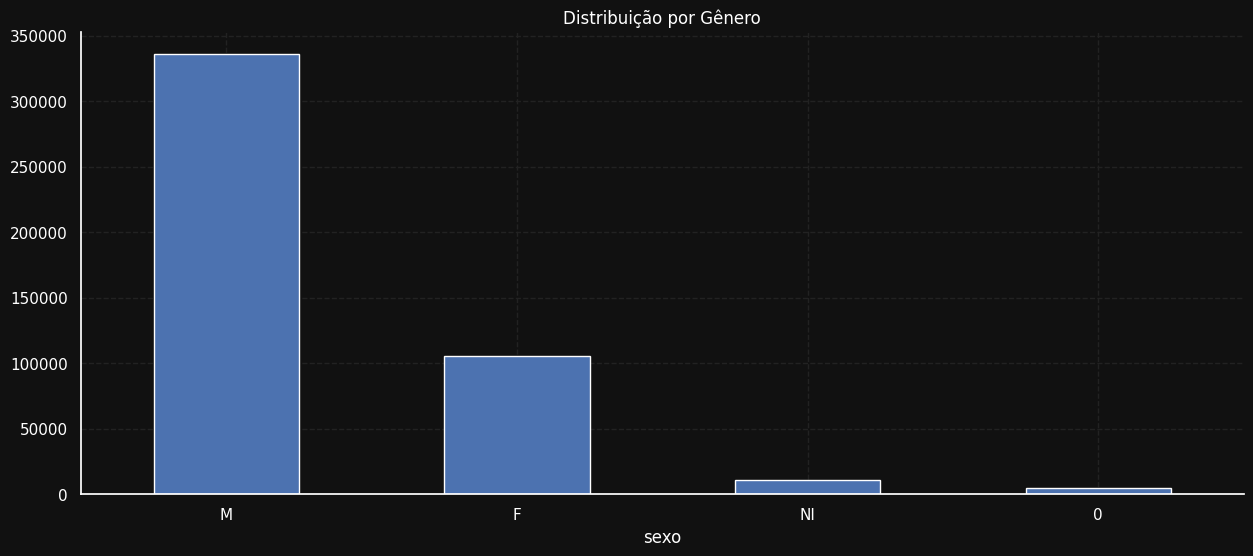

In [18]:
df['sexo'].value_counts().plot(kind='bar', title='Distribuição por Gênero')
plt.xticks(rotation=0);

In [19]:
sem_habilitacao = df[(df['condutor'] == 'S') & (df['descricao_habilitacao'].isna())]
print(f'Total de condutores sem habilitação: {sem_habilitacao.shape[0]}')

Total de condutores sem habilitação: 69023


In [20]:
sem_cinto = df[df['cinto_seguranca'].str.lower() == 'nao']
print(f'Acidentes sem uso do cinto: {sem_cinto.shape[0]}')

Acidentes sem uso do cinto: 98182


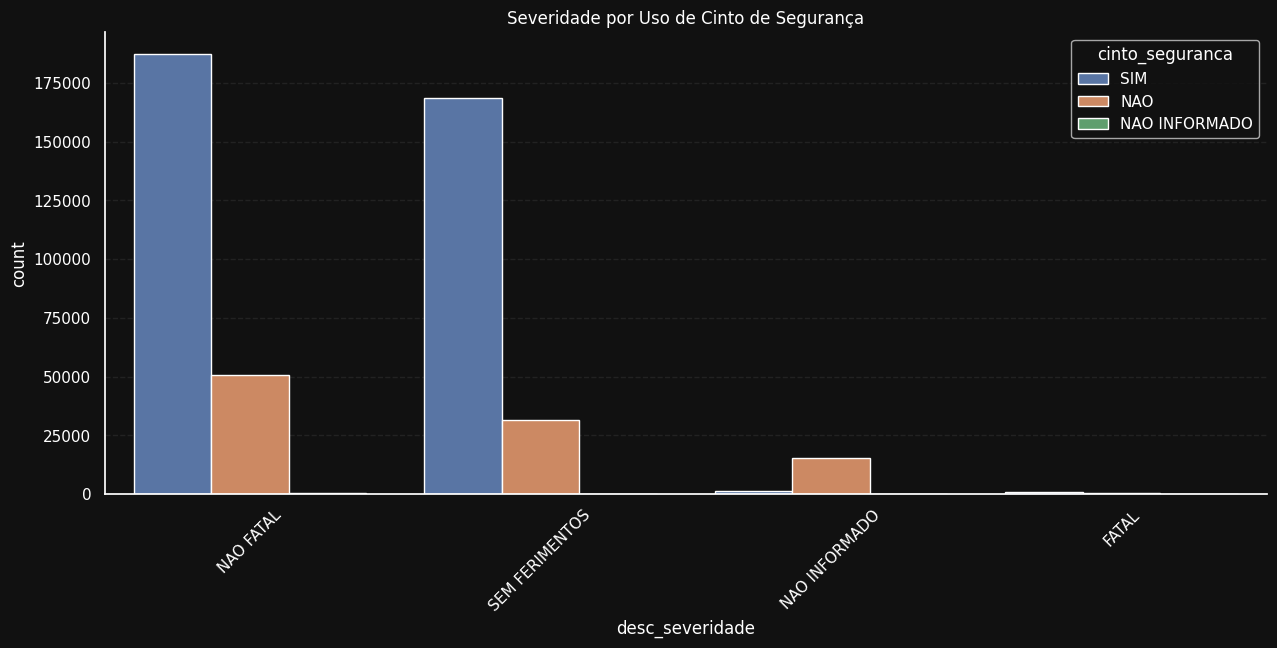

In [21]:
sns.countplot(data=df, x='desc_severidade', hue='cinto_seguranca')
plt.title('Severidade por Uso de Cinto de Segurança')
plt.xticks(rotation=45)
plt.show()

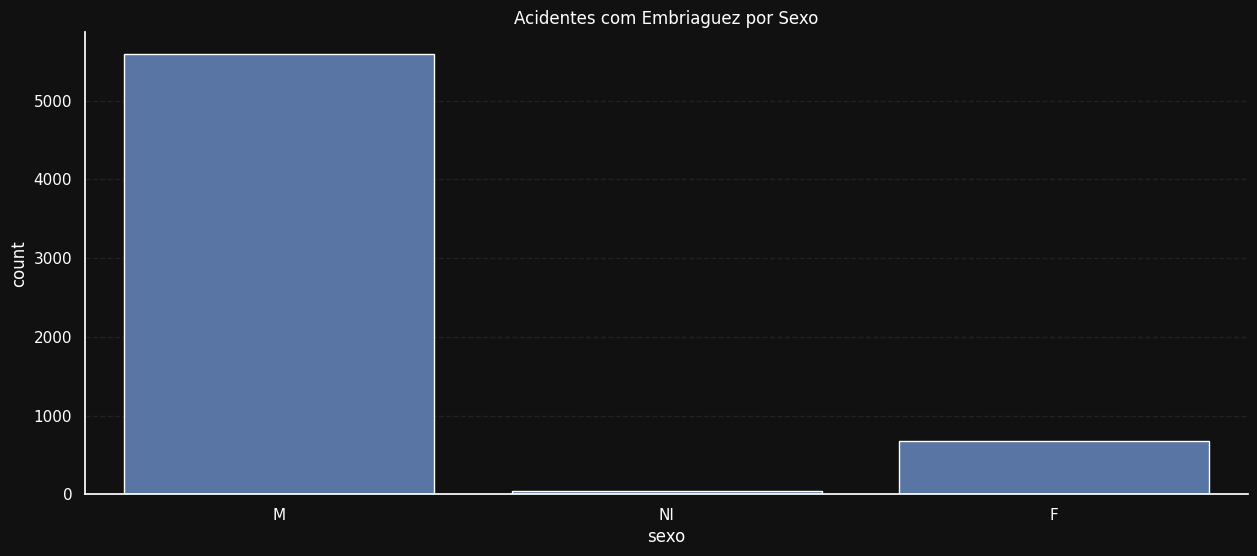

In [22]:
sns.countplot(data=df[df['embreagues'] == 'SIM'], x='sexo')
plt.title('Acidentes com Embriaguez por Sexo')
plt.show()

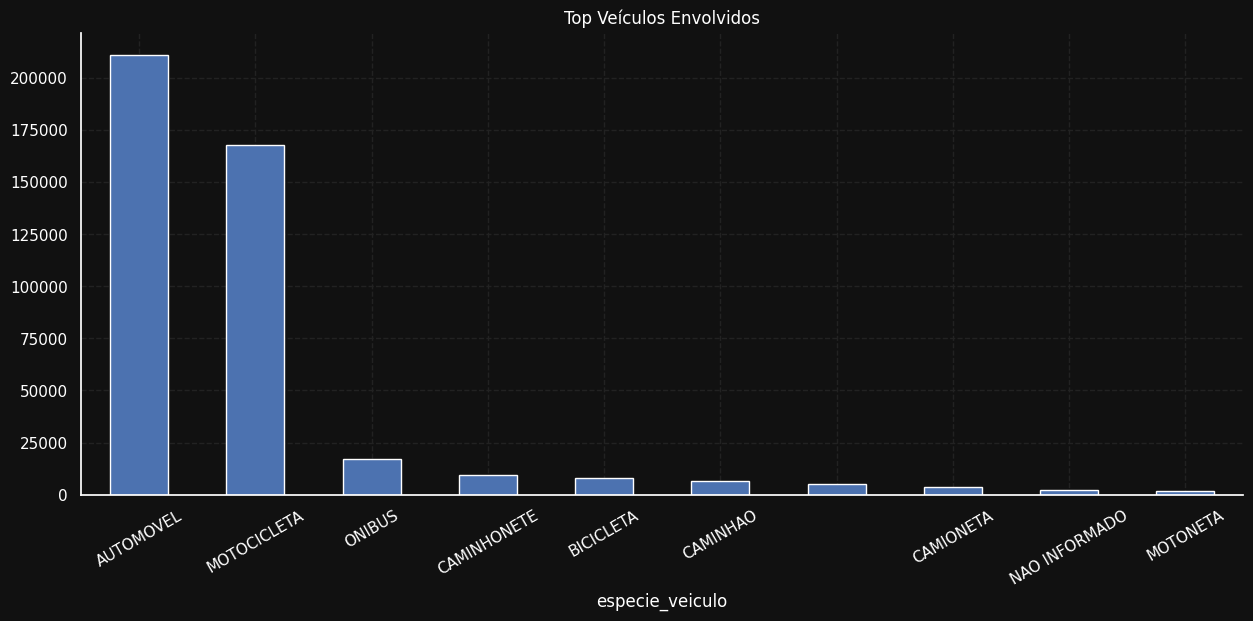

In [23]:
df['especie_veiculo'].value_counts().head(10).plot(kind='bar', title='Top Veículos Envolvidos')
plt.xticks(rotation=30);

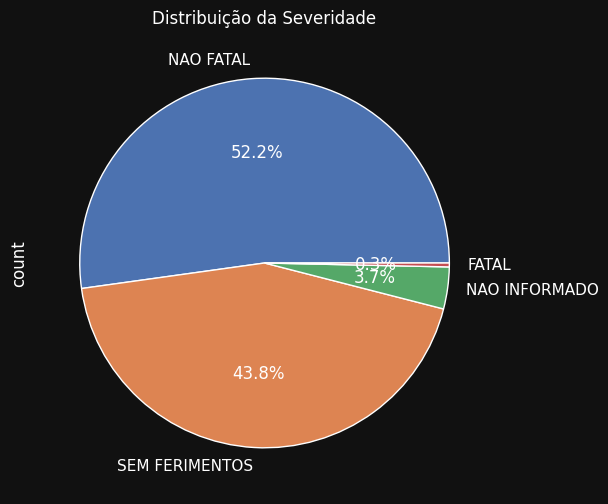

In [24]:
df['desc_severidade'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribuição da Severidade');

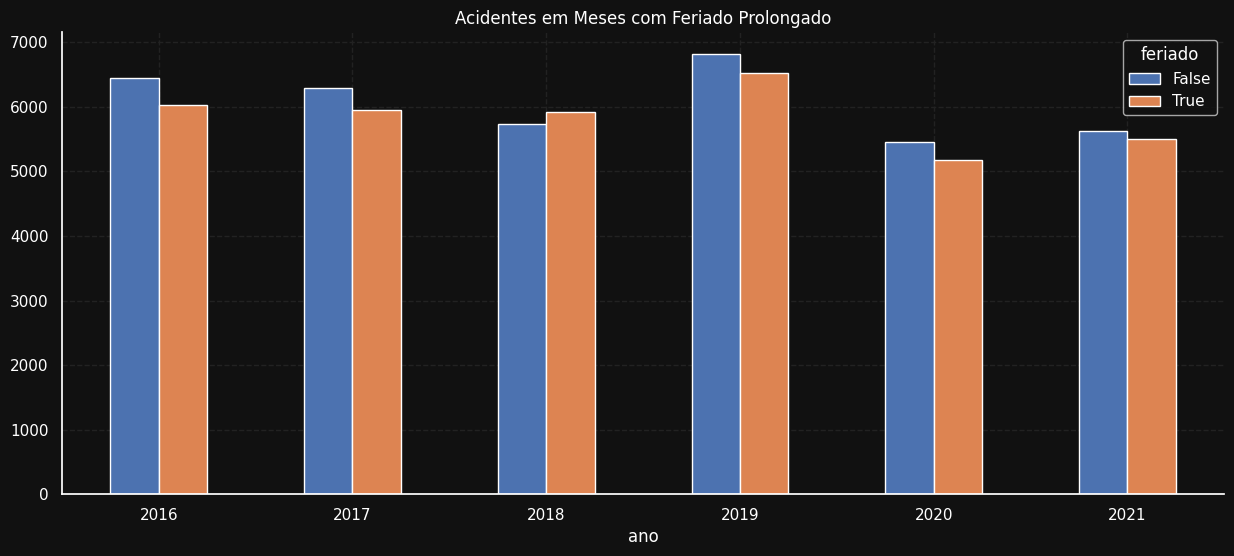

In [25]:
meses_feriados = [1, 4, 6, 10, 11, 12]
df['feriado'] = df['mes'].isin(meses_feriados)

df.groupby(['ano', 'feriado'])['numero_boletim'].nunique().unstack().plot(kind='bar', title='Acidentes em Meses com Feriado Prolongado')
plt.xticks(rotation=0);